
⚡ **COMPUTER VISION**


In [ ]:
!pip install pytesseract


     |████████████████████████████████| 4.3 MB 4.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import os,argparse
import pytesseract
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pytesseract
import csv
import os

In [ ]:
from google.colab import files


In [ ]:
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nuriamg","key":"c1beb14804312f337ef404542cd63e72"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download victordibia/signverod --force

 99% 1.37G/1.38G [00:49<00:00, 23.5MB/s]
100% 1.38G/1.38G [00:49<00:00, 29.8MB/s]


In [ ]:
! unzip signverod.zip

Archive:  signverod.zip
  inflating: categories.csv          
  inflating: image_ids.csv           
  inflating: images/X_000.jpeg       
  inflating: images/X_003.jpeg       
  inflating: images/X_008.jpeg       
  inflating: images/X_014.jpeg       
  inflating: images/X_016.jpeg       
  inflating: images/X_018.jpeg       
  inflating: images/X_019.jpeg       
  inflating: images/X_020.jpeg       
  inflating: images/X_023.jpeg       
  inflating: images/X_025.jpeg       
  inflating: images/X_028.jpeg       
  inflating: images/X_029.jpeg       
  inflating: images/X_031.jpeg       
  inflating: images/X_033.jpeg       
  inflating: images/X_040.jpeg       
  inflating: images/X_041.jpeg       
  inflating: images/X_042.jpeg       
  inflating: images/X_045.jpeg       
  inflating: images/X_047.jpeg       
  inflating: images/X_048.jpeg       
  inflating: images/X_049.jpeg       
  inflating: images/X_052.jpeg       
  inflating: images/X_053.jpeg       
  inflating: images/X_055.

# New Section

In [ ]:
ls

categories.csv  images/      labelmap.txt  signverod.zip  tfrecords/
image_ids.csv   kaggle.json  sample_data/  test.csv       train.csv


In [ ]:
os.getcwd()

'/content'

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['area', 'bbox', 'category_id', 'id', 'image_id'], dtype='object')
Index(['area', 'bbox', 'category_id', 'id', 'image_id'], dtype='object')


In [ ]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

     |████████████████████████████████| 11.1 MB 3.6 MB/s 
     |████████████████████████████████| 112 kB 40.0 MB/s 
  Created wheel for Pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1007497 sha256=4aa91e8115ba2a310ea3e676384687ef5eb27cca63bfd47848072c55f5799509
  Stored in directory: /root/.cache/pip/wheels/ec/1e/24/dbc5e4964ea99cad93230a9013d934fb5adc322c3102f69e45
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=4a7f2962c86838c813ae719cd6f1a2975a3670bcb0f7e7bdbd0a3e79316d6e2c
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built Pillow olefile
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.1.0
    Uninstalling Pillow-9.1.0:
      Successfully uninstalled Pillow-9.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
     |████████████████████████████████| 7.9 MB 3.7 MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=60f26562829bd35a3aa13ff673611ee33b9f6019e393bcdca79ca31afd72c81c
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image


In [ ]:
filepath = 'images/X_067.jpeg'


In [ ]:
from PIL import Image

In [ ]:
sign_image = Image.open(filepath) # Restart runtime to run this cell

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (1,941 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

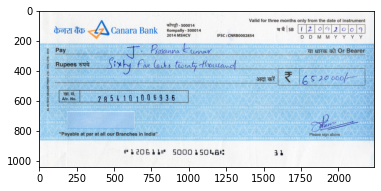

In [ ]:
plt.imshow(sign_image)

**FIND OBJECT CONTOURS**

*   Preprocessing
*   Segmentation
*   Find contours

In [ ]:
def preprocessing_image(filepath: str):
  # Function to convert in grayscale and return the eroded image
  img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  kernel = np.ones((3,3), np.uint8)
  erode_img = cv2.erode(img, kernel, iterations=1)
  return erode_img

In [ ]:
def segmentation_image(img: np.array): # Run imports again to run this cell
  # label connected component and area-base filtering
   square_fitting, threshold = cv2.threshold(img, 127, 255, 0)
   square_fitting, connected_labels = cv2.connectedComponents(threshold,connectivity = 4)
   return threshold, connected_labels

In [ ]:
def find_contours(threshold: np.array, connected_labels: np.array):
  contours, hierarchy = cv2.findContours(connected_labels, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros(threshold.shape, np.uint8)

  counter = 0
  signatureBoundrySigned = []
  for idx in range(0, len(hierarchy[0])):
            rect = x, y, rect_width, rect_height = cv2.boundingRect(contours[idx])

            # fill the contour
            mask = cv2.drawContours(mask, contours, idx, (150, 255, 255), cv2.FILLED)

            # ratio of non-zero pixels in the filled region
            r = float(cv2.countNonZero(mask)) / (rect_width * rect_height)
            if r > 0.45 and rect_height > 25 and rect_width > 25:
                rgb = cv2.rectangle(threshold , (x, y+rect_height), (x+rect_width, y), (0,255,0),1)
                counter = counter + 1
                isSigned = True
  if counter > 1:
      signatureBoundrySigned.append('Signed')
      segmented_Image = Image.fromarray(rgb)
      plt.figure()
      plt.imshow(segmented_Image)
  else:
      signatureBoundrySigned.append('Not Signed')
  return signatureBoundrySigned

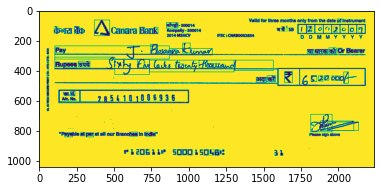

In [ ]:
erode_img = preprocessing_image(filepath)
threshold, connected_labels = segmentation_image(erode_img)
signatureBoundrySigned = find_contours(threshold, connected_labels)

In [ ]:
signatureBoundrySigned

['Signed']

 **USING *PYTESSERACT (OCR)***


*   Get bounding box
*   Get text from the image




In [ ]:
def get_bounding_box(filepath:str):
  #print(pytesseract.image_to_boxes(Image.open(filepath))) # Get bounding box estimates
  txt_data = pytesseract.image_to_string(Image.open(filepath), lang='eng')
  str_data = (pytesseract.image_to_string(filepath))
  file_info = (pytesseract.image_to_data(Image.open(filepath),output_type='data.frame'))
  file_info = file_info.replace(np.nan, '', regex=True)

  osd = pytesseract.image_to_osd(Image.open(filepath)) # Get information about orientation and script detection
  return txt_data, str_data, file_info, osd

In [ ]:
txt_data, str_data, file_info, osd = get_bounding_box(filepath)

In [ ]:
file_info

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,2240,1042,-1,
1,2,1,1,0,0,0,52,251,15,416,-1,
2,3,1,1,1,0,0,52,251,15,416,-1,
3,4,1,1,1,1,0,52,251,15,416,-1,
4,5,1,1,1,1,1,53,646,14,21,96,KL
...,...,...,...,...,...,...,...,...,...,...,...,...
118,5,1,13,1,1,3,1945,815,67,20,96,above
119,2,1,14,0,0,0,1576,929,55,36,-1,
120,3,1,14,1,0,0,1576,929,55,36,-1,
121,4,1,14,1,1,0,1576,929,55,36,-1,


- Make a new dummy column with boolean value, True is *sign* word appears

In [ ]:
def make_df_with_text_content(file_info: pd.DataFrame):
  # Returns df_txt: is a dataframe that cotains only the rows with text -> SIGN WOR
  df_txt = file_info[file_info['text'] != ""]
  df_txt['text'].str.lower()
  df_txt['has_sign_word'] = df_txt['text'].str.contains('sign', case=True, na=False).astype(int)
  df_txt.head()
  return df_txt

In [ ]:
df_txt = make_df_with_text_content(file_info)
df_txt[df_txt['has_sign_word'] == True]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,has_sign_word
117,5,1,13,1,1,2,1892,815,45,24,96,sign,1


- We take the non text characters near the sign word with the finally to get the sign position

In [ ]:
def check_if_has_sign_word(df_txt: pd.DataFrame):
  row_with_sign_word = df_txt[df_txt['has_sign_word'] == 1]
  if row_with_sign_word.empty:
    return [], []
  else:
    # When we find the word 'sign' en the document or image, we find the row position and take the elements greater and minors to find ij¿geniathe sign
    index_row_with_sign_word = row_with_sign_word.index
    pos_l = list(df_img_pos.index)
    n_index = index_row_with_sign_word[0]

    l_greater_index_sign_row = [ p for p in pos_l if p > n_index]
    l_minors_index_sign_row = [ p for p in pos_l if p < n_index]
    l_minors_index_sign_row.reverse()


# TODO - CHECK FIRST IF APPEARS ABOVE, BELOW, UP OR SOME WORD LIKE THAT TO TAKE ONLY THE GREATER OIR MINORS LIST
    if len(l_greater_index_sign_row) >= 3: # Only take the 6 elements closest to the index
      l_greater_index_sign_row = l_greater_index_sign_row[0:3]
    if len(l_minors_index_sign_row) >=3:
      l_minors_index_sign_row = l_minors_index_sign_row[0:3]
      l_greater_index_sign_row.extend(l_minors_index_sign_row)

    return index_row_with_sign_word, l_greater_index_sign_row
    #return index_row_with_sign_word, l_minors_index_sign_row

In [ ]:
def make_df_with_img_content(file_info: pd.DataFrame):
  df_img = file_info[file_info['text'] == ""]
  df_img_pos = df_img[['left','top','width','height']] # A new df with positions of the possible image
  return df_img, df_img_pos

In [ ]:
df_img, df_img_pos =  make_df_with_img_content(file_info)

In [ ]:
index_row_with_sign_word, l_index_to_study = check_if_has_sign_word(df_txt)
print(f'This is the index row when we find the sign word: {index_row_with_sign_word}')
print(f'This is the index rows with no text content that are closest that the index: {l_index_to_study}')

This is the index row when we find the sign word: Int64Index([117], dtype='int64')
This is the index rows with no text content that are closest that the index: [119, 120, 121, 115, 114, 113]


In [ ]:
def getting_possible_sign(img, df_img_pos: pd.DataFrame, l_index_to_study: list):
  dff =[ df_img_pos.loc[i].to_list() for i in l_index_to_study]
  dff = pd.DataFrame(dff, columns = list(df_img_pos.columns))
  for i in range(len(dff)):
    (x, y, w, h) = (dff.iloc[i]['left'],dff.iloc[i]['top'],dff.iloc[i]['width'],dff.iloc[i]['height'])
    print((x, y, w, h))
    img_r = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(img_r)

    return img_r


(1576, 929, 55, 36)


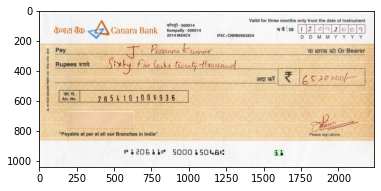

In [ ]:
img = cv2.imread(filepath)
img_r = getting_possible_sign(img, df_img_pos, l_index_to_study)

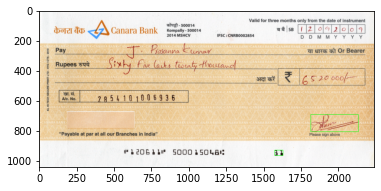

In [ ]:
(x,y,w,h) = (1817,	691,	318,	115)
img_r = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img_r)

In [ ]:
cut_img = Image.open(filepath)
cut_img = cut_img.crop((x,	y,	x+w,	y+h))
cut_img.save(filepath + '_0.png')

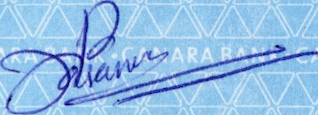

In [ ]:
cut_img

In [ ]:
file_info_dict = pytesseract.image_to_data(Image.open(filepath), output_type="dict")
file_info_dict.keys()
#file_info_dict = {k: v for k, v in file_info_dict.items() if file_info_dict['text'] != ""}

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [ ]:
desired_value = ""
for key, value in file_info_dict.items():
  if value == desired_value:
    del file_info_dict[key]
    break


In [ ]:
def get_images_signed():
  images_l = os.listdir('images')
  for image in images_l[0:10]: #TODO with all images
    erode_img = preprocessing_image('images/'+image)
    threshold, connected_labels = segmentation_image(erode_img)
    find_contours(threshold, connected_labels)


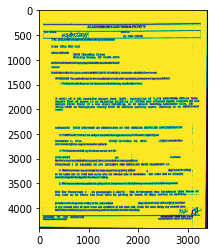

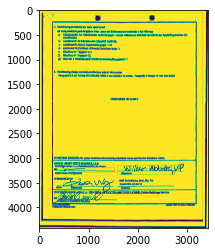

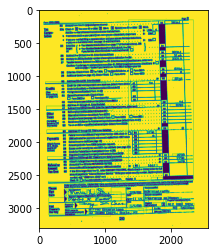

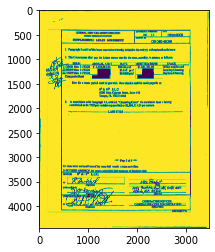

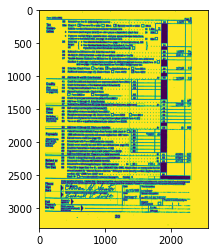

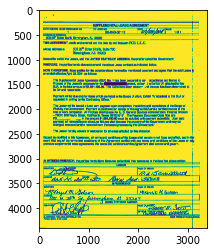

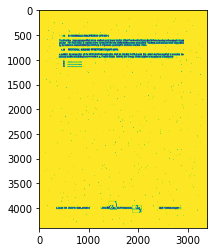

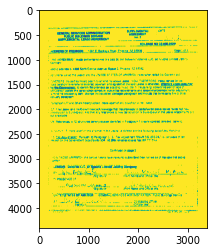

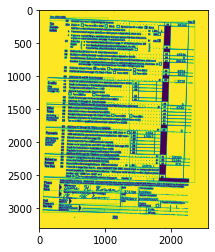

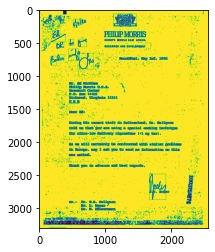

In [ ]:
get_images_signed()

In [ ]:
plt.rcParams['figure.max_open_warning'] = 20000


In [ ]:
def get_images_ocr():
  images_l = os.listdir('images')
  for image in images_l[0:6]: #TODO with all images
    txt_data, str_data, file_info, osd = get_bounding_box('images/'+image)
    df_txt = make_df_with_text_content(file_info)
    #if df_txt !=[]:
    index_row_with_sign_word, l_index_to_study = check_if_has_sign_word(df_txt)
    df_img, df_img_pos =  make_df_with_img_content(file_info)
    img = cv2.imread('images/'+image)
    img_r = getting_possible_sign(img, df_img_pos, l_index_to_study)
    #else:
    #print('not sign word')
